# PREDICTION OF THE STRENGTH OF CONCRETE

In [1]:
#crearing working directory
import os
os.chdir("E:\Data Analytics\Kaggle")

In [2]:
os.getcwd()

'E:\\Data Analytics\\Kaggle'

In [3]:
#import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
#load the data
data = pd.read_csv("Concrete_Data.csv")

In [5]:
data.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [6]:
data.shape

(1030, 9)

#### this dataset contains 9 columns (or features) and 1030 observation
#### "csMPa" is dependent feature and other 8 are independent features

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement              1030 non-null float64
slag                1030 non-null float64
flyash              1030 non-null float64
water               1030 non-null float64
superplasticizer    1030 non-null float64
coarseaggregate     1030 non-null float64
fineaggregate       1030 non-null float64
age                 1030 non-null int64
csMPa               1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [8]:
#Checking missing values
data.isnull().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

#### Out of 9 variable Data type of 8 variable is float and 1 is integer.
#### this dataset does not contains any missing values as all of features contains 1030 entries (as number of observation is also 1030). As the dataset contains only 9 featues we can easily found out .

#### let's discuss about all the features.. Little bit of knowledge about features will help in analyzing the data more properly..
1. "cement" : is quantitative feature.It is a component of Concrete. Observations in this feature implies quantity of Cement
2. "slag" : is quantitative feature.It is also a cement kind of thing.It is a component of Concrete.Observations in this feature implies its quantity.
3. "flyash" : is quantitative feature.It is a component of Concrete. Observations in this feature implies its quantity.
4. "water" : is quantitative feature.It is a component of Concrete. Observations in this feature implies its quantity.
5. "superplasticizer" : is quantitative feature.It is a component of Concrete used to make high strength concrete.Observations in this feature implies its quantity.
6. "coarseaggregate" :  is quantitative feature.It is a component of Concrete.also known as Stone chips of certain measures.Observations in this feature implies its quantity.
7. "fineaggregate" : is quantitative feature.It is a component of Concrete. Known as Sand.Observations in this feature implies its quantity.
8. "age" : is quantitative feature. Age of the concrete define by this.
9. "csMPa" : is quantitative feature.It is the measure of strength of concrete.

## Outlier Checking
#### at a time one feature

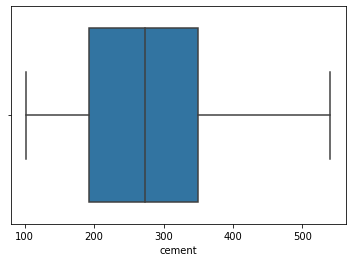

In [9]:
sns.boxplot(data["cement"])

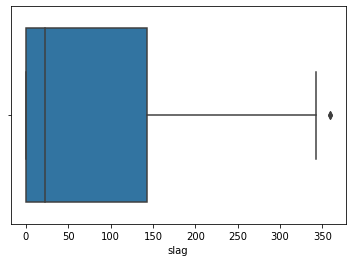

In [10]:
sns.boxplot(data["slag"])

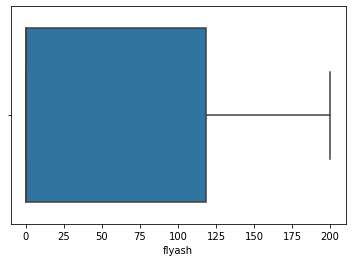

In [11]:
sns.boxplot(data["flyash"])

In [12]:
data2 = data[data.flyash == 0]
data2.shape[0]

566

so the column "flyash" has zero values in 566 observation out of total 1030 . So, lets remove it

In [13]:
data.drop(columns = ["flyash"] , inplace = True)

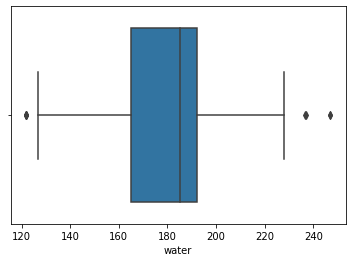

In [14]:
sns.boxplot(data["water"])

In [15]:
print("Maximum value in the feature water:" ,data["water"].max())
print("Minimum value in the feature water:" ,data["water"].min())

Maximum value in the feature water: 247.0
Minimum value in the feature water: 121.8


#### So it look like these outliers are not an issue

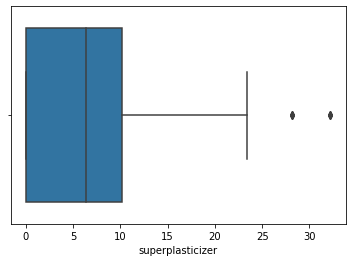

In [16]:
sns.boxplot(data["superplasticizer"])

In [17]:
print("Mean:" , data["superplasticizer"].mean())
print("Max:" , data["superplasticizer"].max())
print("quantile(95% , 97.5% , 99% respectively):" , data["superplasticizer"].quantile([0.95,0.975,0.99]))

Mean: 6.204660194174757
Max: 32.2
quantile(95% , 97.5% , 99% respectively): 0.950    16.055
0.975    18.655
0.990    23.400
Name: superplasticizer, dtype: float64


Lets remove this feature as its make a bad effect in our model

In [18]:
data2 = data[data.superplasticizer > 23.4]
print("Number of observation with values greater than 99% quartile:" , data2.shape[0])

Number of observation with values greater than 99% quartile: 10


#### So we remove this 1.54% data from "superplasticizer" column

In [19]:
data = data[data.superplasticizer <= 23.4]
data.shape

(1020, 8)

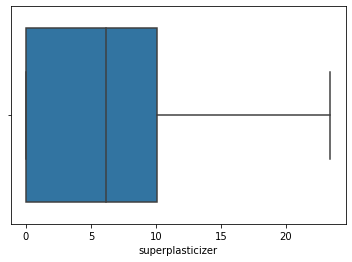

In [20]:
# Now check outlier
sns.boxplot(data["superplasticizer"])

#### So we remove the outlier from the feature "superplasticizer"

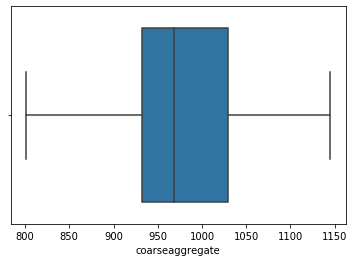

In [21]:
sns.boxplot(data["coarseaggregate"])

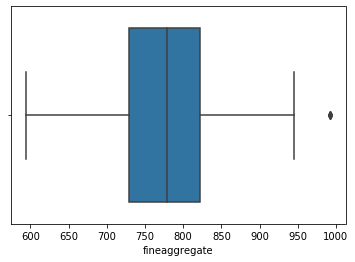

In [22]:
sns.boxplot(data["fineaggregate"])

In [23]:
data["fineaggregate"].sort_values(ascending = False).head(10)

166    992.6
97     992.6
120    992.6
74     992.6
143    992.6
551    945.0
542    945.0
543    945.0
545    945.0
714    943.1
Name: fineaggregate, dtype: float64

#### So it looks like this outlier is not an issue

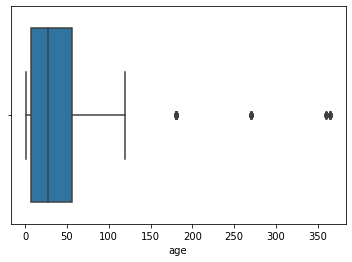

In [24]:
sns.boxplot(data["age"])

In [25]:
data["age"].sort_values(ascending = False).head(10)

30     365
31     365
622    365
3      365
24     365
620    365
6      365
34     365
41     365
610    365
Name: age, dtype: int64

In [26]:
df = data[data.age <= 165 ]

In [27]:
print(f"in order to remove outlier we remove {((len(data)-len(df))/len(data))*100} % data from our original dataset")

in order to remove outlier we remove 5.784313725490196 % data from our original dataset


In [28]:
print(f"Now the dataset contains {df.shape[0]} nos observation")

Now the dataset contains 961 nos observation


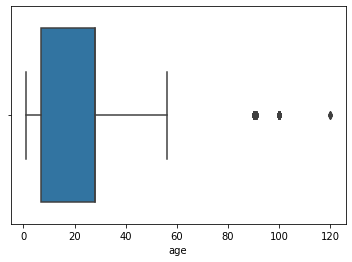

In [29]:
sns.boxplot(df["age"])

#### it contains few more outlier but let's not remove more rows as it may effect our model

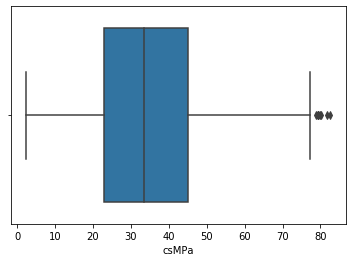

In [30]:
#checking outlier of dependent variable
sns.boxplot(df["csMPa"])

In [31]:
df.head()

,cement,slag,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
5,266.0,114.0,228.0,0.0,932.0,670.0,90,47.03
7,380.0,95.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,228.0,0.0,932.0,670.0,28,45.85


In [32]:
df.shape

(961, 8)

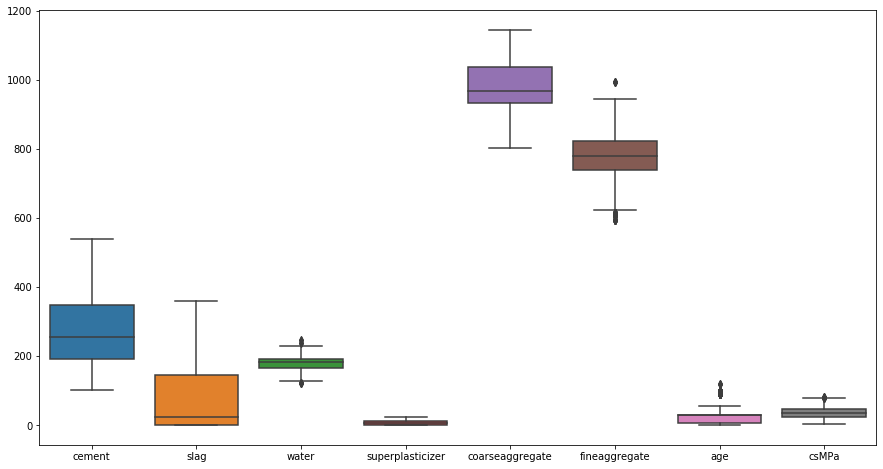

In [33]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df)

### Multicollinearity

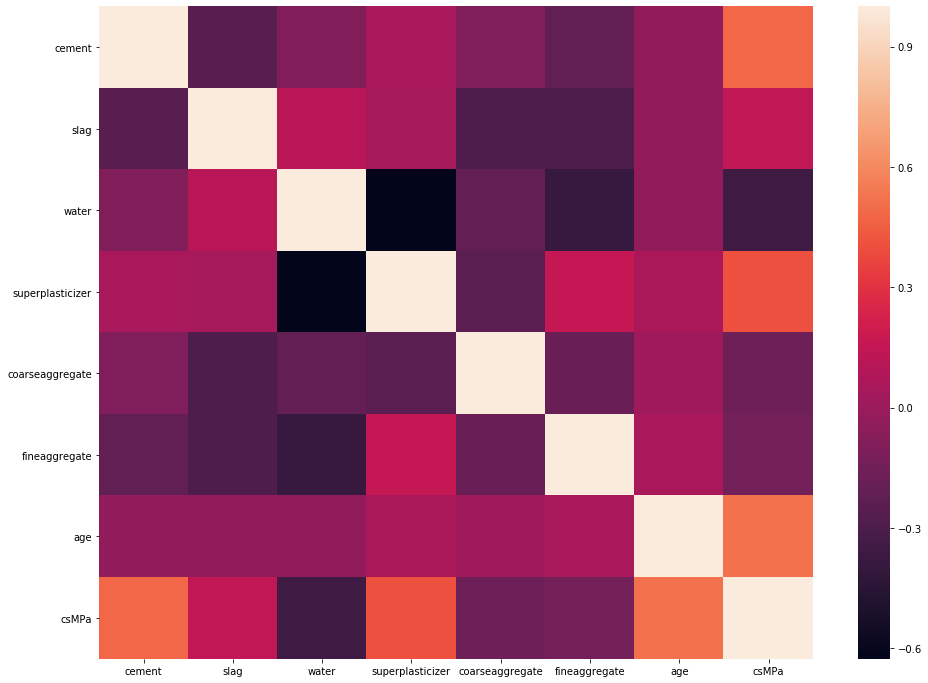

In [34]:
fig,ax = plt.subplots(figsize = (16,12))
corrMat = df.corr()
sns.heatmap(corrMat)

From the above correlation heatmap it is clear that no features are highly correlated to each other

## Splitting the dataset into the Training set and Test set

In [35]:
#dependent variable
y = df.iloc[: , -1].values

In [36]:
#independent variables
x = df.iloc[:,:-1].values

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.35, random_state = 14)

In [38]:
y_val = y_test

## Feature Scaling

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [40]:
#Converting 1D array to 2D array
y_train = y_train.reshape(len(y_train) , 1)
y_test= y_test.reshape(len(y_test) , 1)

In [41]:
#from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

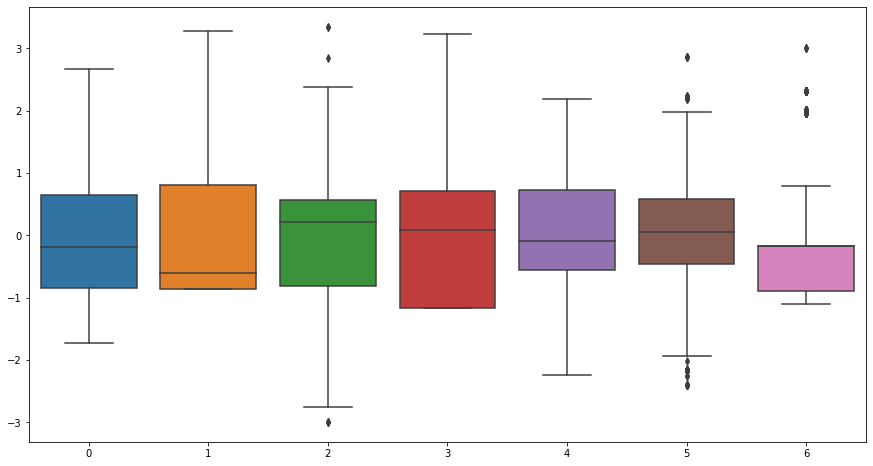

In [42]:
plt.figure(figsize=(15,8))
sns.boxplot(data=x_train)

# Modeling Part

## Linear Regression

In [43]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
from sklearn.metrics import mean_squared_error, r2_score

In [45]:
y_pred = regressor.predict(x_test)

In [46]:
print("Coefficients: \n", regressor.coef_)

Coefficients: 
 [[ 0.46758313  0.20875028 -0.38084155  0.11000674 -0.16864612 -0.19576853
   0.52711063]]


In [47]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Mean squared error: 0.24


In [48]:
print("Coefficient of determination: %.2f" % r2_score(y_test,y_pred))

Coefficient of determination: 0.76


In [49]:
#as the data is scaled.so we get back the data in it's original form
y_pred_output = scaler.inverse_transform(regressor.predict(x_test))

In [50]:
#Let's compare predicted and original
np.set_printoptions(precision=2)
print(np.concatenate((y_pred_output.reshape(len(y_pred_output),1), y_val.reshape(len(y_val),1)),1))

[[54.55 44.52]
 [69.22 64.9 ]
 [32.99 37.17]
 [34.63 30.65]
 [33.72 32.96]
 [25.7  22.95]
 [28.33 26.14]
 [77.92 65.2 ]
 [51.09 33.4 ]
 [35.89 24.44]
 [27.53 37.4 ]
 [26.55 30.28]
 [48.29 47.71]
 [40.24 49.77]
 [14.31 12.18]
 [53.95 60.28]
 [56.44 38.22]
 [76.08 73.3 ]
 [18.92 10.73]
 [39.42 39.66]
 [37.31 36.94]
 [26.03 32.9 ]
 [40.95 40.87]
 [25.69 23.52]
 [22.91 26.26]
 [26.79 32.72]
 [58.34 40.6 ]
 [49.63 38.02]
 [50.03 56.06]
 [35.86 36.94]
 [17.76  9.74]
 [32.94 35.57]
 [26.32 33.66]
 [42.64 44.13]
 [34.58 41.68]
 [27.05 31.45]
 [41.4  42.03]
 [31.7  29.23]
 [25.12 17.57]
 [56.8  74.99]
 [40.13 53.52]
 [28.48 33.73]
 [35.84 29.98]
 [64.57 61.07]
 [48.14 32.85]
 [18.58 15.58]
 [27.6  27.66]
 [26.25 29.55]
 [39.06 48.99]
 [29.57 23.84]
 [24.32 23.25]
 [44.22 44.14]
 [29.79 21.78]
 [28.16 31.12]
 [20.65 16.26]
 [ 8.93  8.37]
 [27.41 26.86]
 [30.25 34.29]
 [41.74 41.67]
 [53.96 51.02]
 [35.84 43.7 ]
 [10.31 10.09]
 [44.22 52.82]
 [42.08 39.7 ]
 [29.52 31.87]
 [ 8.16  9.85]
 [41.94 51

In [51]:
#Defining MAPE(Mean Absolute Percentage Error) function
def MAPE(y_val,y_pred_output):
    mape = np.mean(np.abs((y_val - y_pred_output)/y_val))*100
    return mape

In [52]:
print("MAPE :",MAPE(y_val,y_pred_output))

MAPE : 75.71628445391563


In [53]:
# So it is clear that the result need to be predict more accurately..some more operation needed to increase accuracy..
#We will do it very soon..